I'm now pretty good at Matplotlib and Seaborn (I found mpl pretty obstuse for ages with its two approaches (OOP vs stateful), whereas Seaborn is far easier out-of-the-box) and would now like to give Plotly a go as interactive plots sound like they could unlock some much needed user-accessibility/ interactability which would be good for reports at work

In [55]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import math
from alex_module import df_prepper
from alex_module import plotter
from alex_module import df_describer

df = pd.read_csv('raw_data/all_energy_statistics1.csv')
df = df_prepper.csv_combiner(df,verbose=False)

df_ = df_prepper.df_groupby_then_flatten(df,
                                         cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                        cols_to_groupby=['country_or_area','year','category'],
                                        aggregate='sum')

# Time series line plot

## Matplotlib function to plot multiple countries and energy types

In [93]:
def mpl_line_plot(df,countries,columns):
    '''Plot time series values of energy types for different countries
    
    Parameters
    ----------
    df : pandas dataframe
    countries : list
    column : list
    '''
    fig = plt.figure()
    ax = plt.axes()
    
    # Limit dataframe to requested countries
    df = df_[df_['country_or_area'].isin(countries)].copy()

    # Limited dataframe to requested columns, plus country_or_area as this data is needed
    columns.append('country_or_area')
    df = df[columns]
    
    # Performing a groupby 
    df = df.groupby(['year','country_or_area']).sum().copy()
    
    # Unstacking the groupby to make separate columns per country
    df = df.unstack().copy()
    
    ax.plot(df)
    
    # TODO: Add some code to clean up the column names for the legend
    # TODO: Alter the line colours to try and group by country. Maybe one country is 1 colour at varying transparencies
    
    ax.legend(df.columns)

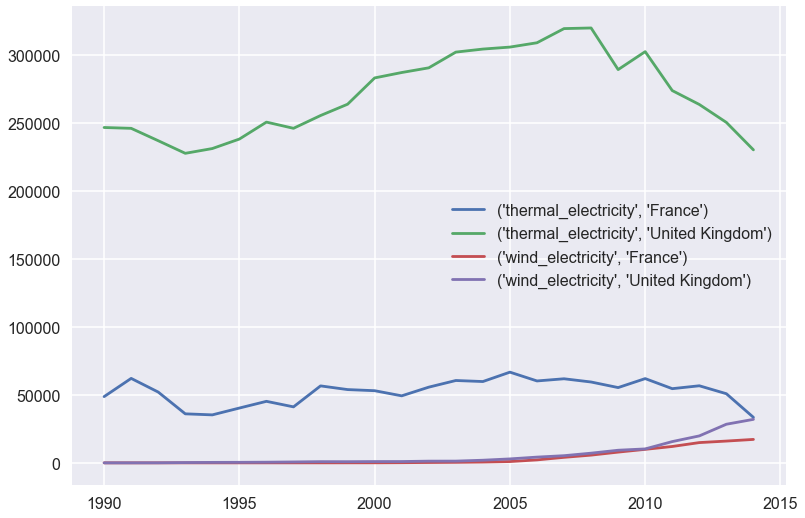

In [94]:
mpl_line_plot(df_,countries=['United Kingdom','France'],columns=['thermal_electricity','wind_electricity'])